       brand  no. of rating  market share
0      Apple           1682         3.364
1      Honor             39         0.078
2       IQOO            425          0.85
3    Infinix           3208         6.416
4        Jio              1         0.002
5    KARBONN             68         0.136
6   Kechaoda           1633         3.266
7       LAVA            100           0.2
8   MOTOROLA             80          0.16
9   Micromax            351         0.702
10  Motorola           3531         7.062
11     Nokia           4861         9.722
12   OnePlus           3609         7.218
13      POCO           2727         5.454
14     REDMI           9931        19.862
15   SAMSUNG           1368         2.736
16   Samsung            228         0.456
17     Tecno           1780          3.56
18      itel           1653         3.306
19    realme           9339        18.678
20      vivo           3386         6.772
                                    product name    price  discount price  \

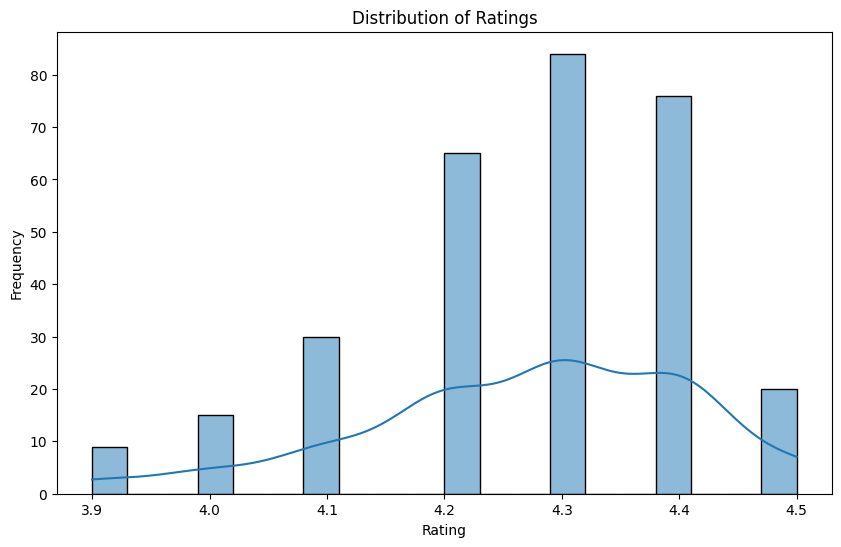

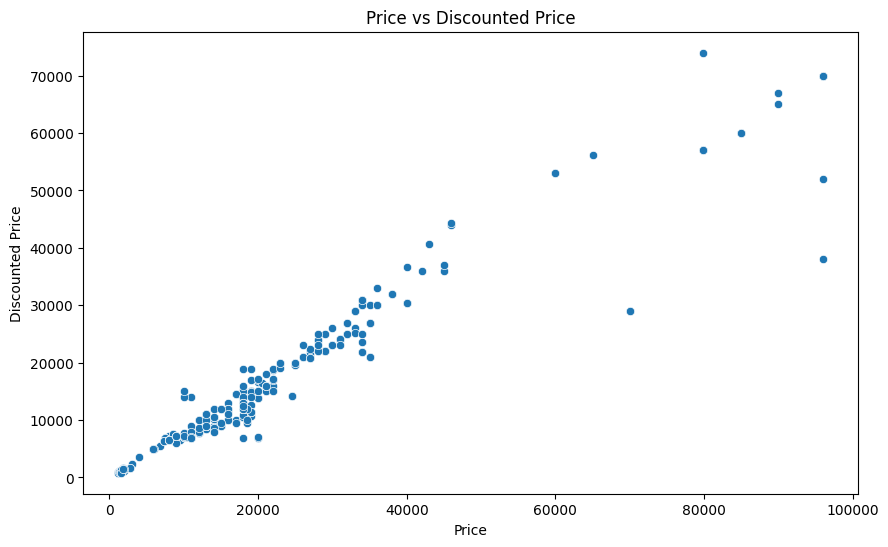

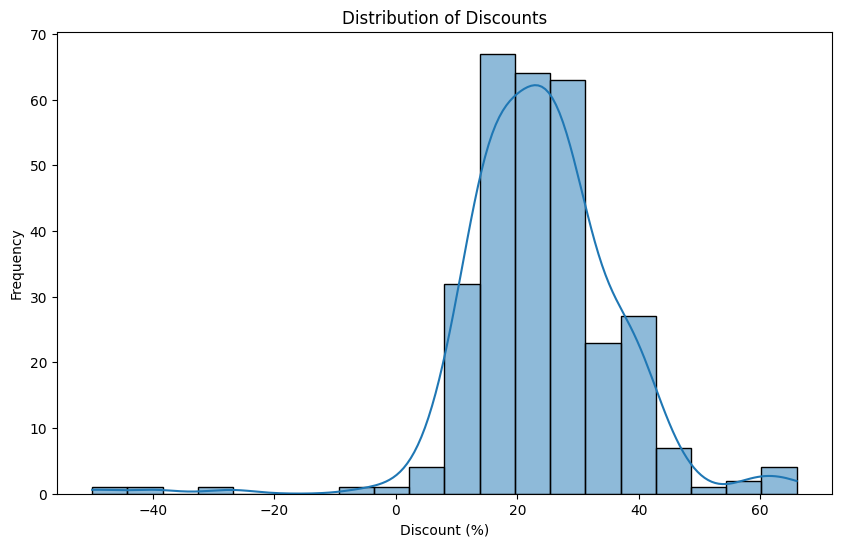

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
file_path = "/content/mobile_dataset.csv"
data = pd.read_csv(file_path)

# Convert rating to float
data['rating'] = data['rating'].astype(float)

# Convert no. of rating to int after removing commas
data['no. of rating'] = data['no. of rating'].str.replace(',', '', regex=False).str.extract(r'(\d+)')
data['no. of rating'] = data['no. of rating'].astype(float).astype('Int64')

# Convert discount price and price to int after removing commas and currency symbols
data['discount price'] = pd.to_numeric(data['discount price'].str.replace(r'[?,]', '', regex=True), errors='coerce')
data['price'] = pd.to_numeric(data['price'].str.replace(r'[?,]', '', regex=True), errors='coerce')

# Extract brand names (assuming the product name contains the brand)
data['brand'] = data['product name'].str.split().str[0]

# Calculate total number of ratings for each brand
brand_ratings = data.groupby('brand')['no. of rating'].sum().reset_index()

# Calculate market share for each brand
total_ratings = brand_ratings['no. of rating'].sum()
brand_ratings['market share'] = (brand_ratings['no. of rating'] / total_ratings) * 100

# Display the brand ratings and market share
print(brand_ratings)

# Get top 5 best-selling watches for each brand
top_5_mobile_phones = data.groupby('brand').apply(lambda x: x.nlargest(5, 'no. of rating')).reset_index(drop=True)

# Display the top 5 best-selling watches for each brand
print(top_5_mobile_phones)

# Define price ranges
bins = [0, 2000, 4000, 6000, 8000, 10000, float('inf')]
labels = ['0-2K', '2K-4K', '4K-6K', '6K-8K', '8K-10K', '10K+']
data['price range'] = pd.cut(data['price'], bins=bins, labels=labels)

# Identify top rated watches within each price range
top_rated_per_price_range = data.groupby('price range').apply(lambda x: x.nlargest(1, 'rating')).reset_index(drop=True)

# Display the top rated watches per price range
print(top_rated_per_price_range)

# Plotting the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Relationship between price and discounted price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['price'], y=data['discount price'])
plt.title('Price vs Discounted Price')
plt.xlabel('Price')
plt.ylabel('Discounted Price')
plt.show()

# Distribution of discounts
discounts = ((data['price'] - data['discount price']) / data['price']) * 100
plt.figure(figsize=(10, 6))
sns.histplot(discounts, bins=20, kde=True)
plt.title('Distribution of Discounts')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.show()

# Top rated watches
top_rated = data.nlargest(10, 'rating')

fig = px.bar(top_rated, x='product name', y='rating', title='Top 10 Rated Watches')
fig.show()

# Plotting the market share of top-selling brands
fig = px.pie(brand_ratings, names='brand', values='market share', title='Market Share of Top-Selling Brands')
fig.show()
